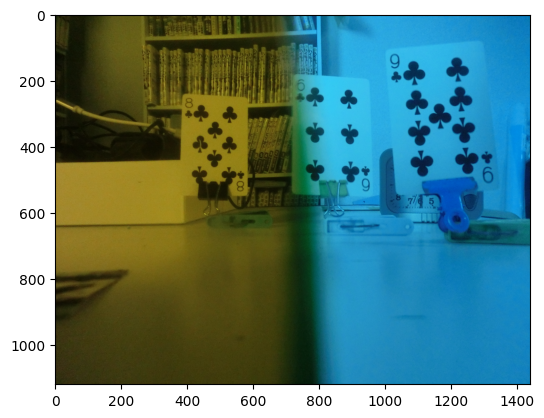

r


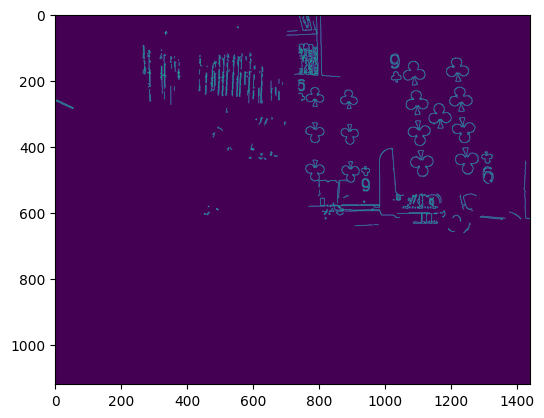

g


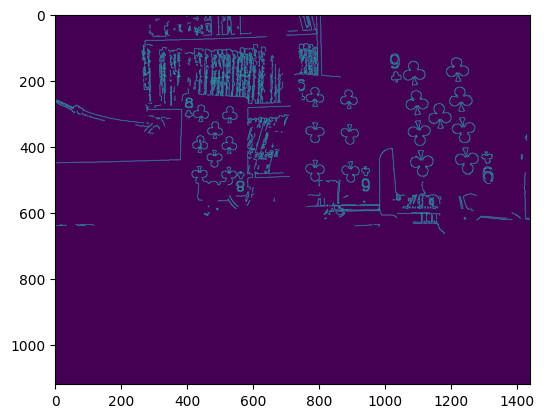

b


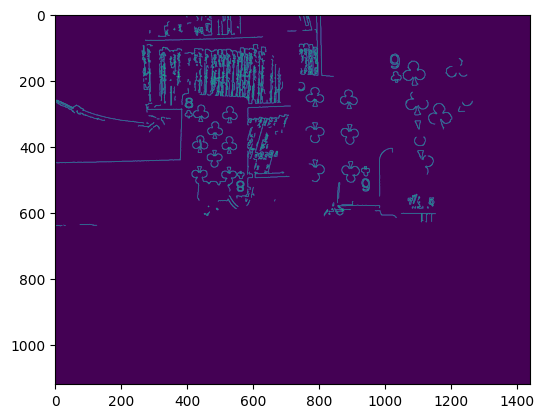

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image):
    """Detect edges in the image using the Canny edge detector."""
    edges = cv2.Canny(image, 100, 200)
    return edges

def calculate_displacement(edges_r, edges_g, edges_b):
    """Calculate the displacement between edges in different color channels."""
    # Find the non-zero coordinates in each edge image
    coords_r = np.column_stack(np.where(edges_r > 0))
    coords_g = np.column_stack(np.where(edges_g > 0))
    coords_b = np.column_stack(np.where(edges_b > 0))
    
    coords_r = coords_r.resize(coords_g.shape[0], 2)
    coords_b = coords_b.resize(coords_g.shape[0], 2)
    print(coords_r.shape, coords_b.shape, coords_g.shape)
    # Calculate the mean displacement between the edges
    displacement_rg = np.mean(np.sqrt(np.sum((coords_r - coords_g)**2, axis=1)))
    displacement_rb = np.mean(np.sqrt(np.sum((coords_r - coords_b)**2, axis=1)))
    displacement_gb = np.mean(np.sqrt(np.sum((coords_g - coords_b)**2, axis=1)))
    
    return displacement_rg, displacement_rb, displacement_gb



def play(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1440, 1120))
    plt.imshow(image),plt.show()
    if image is None:
        print("Error: Could not load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect edges in the grayscale image
    edges = detect_edges(gray)
    
    # Separate the color channels
    b, g, r = cv2.split(image)
    
    # Detect edges in each color channel
    edges_r = detect_edges(r)
    edges_g = detect_edges(g)
    edges_b = detect_edges(b)
    print("r")
    plt.imshow(edges_r),plt.show()
    print("g")
    plt.imshow(edges_g),plt.show()
    print("b")
    plt.imshow(edges_b),plt.show()


# Run the main function with the path to your image
c = 'cyan.JPG'
y = 'yellow.JPG'
hcy = '0724/hhcy.JPG'
hyc = '0724/hhyc.JPG'
a = 'add.JPG'
play(hcy)


(1920, 2560, 3)


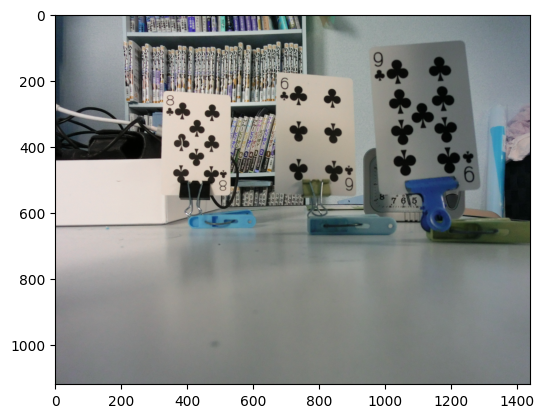

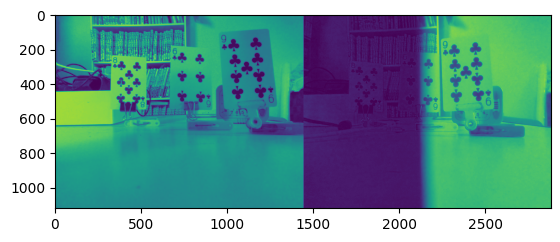

blue  Mean value for normal lens image: 128.72873
blue  Mean value for filtered lens image: 93.93155
blue  Channel Transmittance: 0.72968596


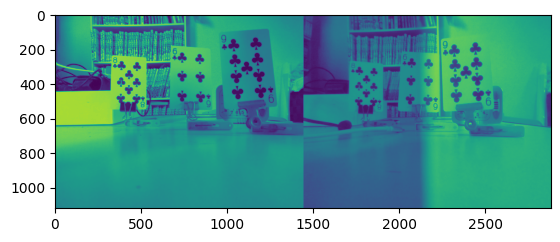

green  Mean value for normal lens image: 130.96202
green  Mean value for filtered lens image: 117.80557
green  Channel Transmittance: 0.89953995


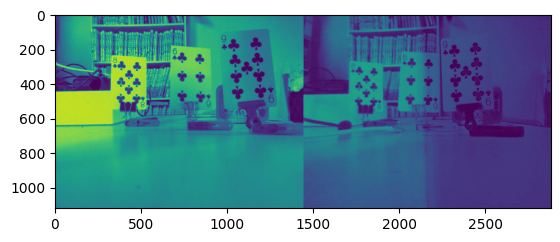

red  Mean value for normal lens image: 127.85207
red  Mean value for filtered lens image: 59.703568
red  Channel Transmittance: 0.46697378
(1920, 2560, 3)


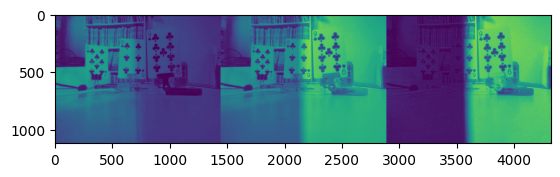

(<matplotlib.image.AxesImage at 0x7f92b64804c0>, None)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def load(path):
    image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    image = cv2.resize(image, (1440, 1120))
    return image/255
def transparency(image_path, original, types):
    def calmain(color_name, channel_normal, channel_filtered):
        # Calculate the mean value of the green channel for both images
        mean_normal = np.mean(channel_normal)
        mean_filtered = np.mean(channel_filtered)
        
        # Calculate the green channel transmittance
        transmittance = mean_filtered / mean_normal
        
        # Print the results
        
        print(str(color_name), " Mean value for normal lens image:", mean_normal)
        print(str(color_name), " Mean value for filtered lens image:", mean_filtered)
        print(str(color_name), " Channel Transmittance:", transmittance)

    image_normal = cv2.cvtColor(cv2.imread(original), cv2.COLOR_BGR2RGB)
    image_normal = cv2.resize(image_normal, (1440, 1120))
    #image_normal = image_normal[:, int(1440/2):] 
    #image_normal = image_normal[:, :int(1440/2)]
    image_filtered = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    image_filtered = cv2.resize(image_filtered, (1440, 1120))
    #image_filtered = image_filtered[:, int(1440/2):]
    #image_filtered = image_filtered[:, :int(1440/2)]
    # Ensure images are the same size
    if image_normal.shape != image_filtered.shape:
        raise ValueError("Images must be the same size for comparison")
    
    # Convert images to float32 type for precision
    image_normal = image_normal.astype(np.float32)
    image_filtered = image_filtered.astype(np.float32)
    
    # Extract the green channel from both images
    if types==1:
        color_name = 'green'
        channel_normal = image_normal[:, :, types]  # OpenCV uses BGR, so index 1 is G
        channel_filtered = image_filtered[:, :, types]
    elif types==0:
        color_name = 'blue'
        channel_normal = image_normal[:, :, types]  # OpenCV uses BGR, so index 1 is G
        channel_filtered = image_filtered[:, :, types]
    elif types==2:
        color_name = 'red'
        channel_normal = image_normal[:, :, types]  # OpenCV uses BGR, so index 1 is G
        channel_filtered = image_filtered[:, :, types]
    p_ = np.hstack([channel_normal, channel_filtered])
    plt.imshow(p_),plt.show()
    calmain(color_name, channel_normal, channel_filtered)


original = "0724/original.JPG"
tname = hcy


image = load(original)
plt.imshow(image),plt.show()
transparency(tname, original, types=0)
transparency(tname, original, types=1)
transparency(tname, original, types=2)

# show each channel individually
image = load(tname)
(B, G, R) = cv2.split(image)
pack = np.hstack([B, G, R])
plt.imshow(pack),plt.show()

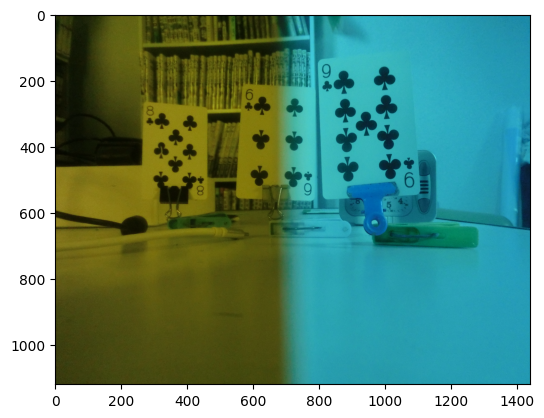

r


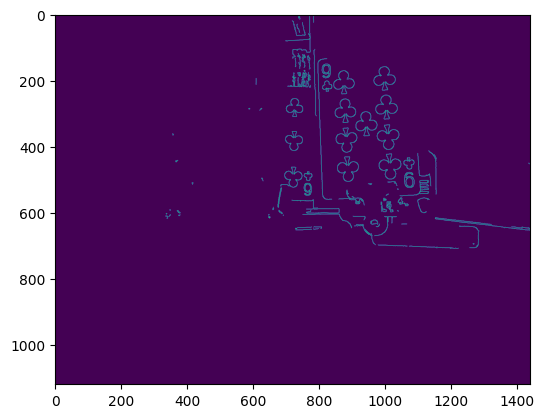

g


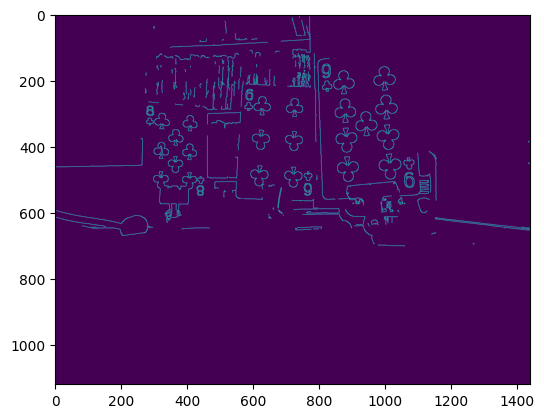

b


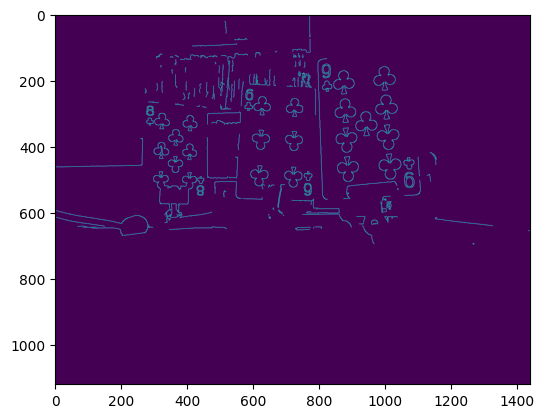

In [18]:
# Run the main function with the path to your image
c = 'cyan.JPG'
y = 'yellow.JPG'
hcy = 'original_privicous/hhcy.JPG'
hyc = 'original_privicous/hhyc.JPG'
a = 'add.JPG'
play(hcy)


(1920, 2560, 3)


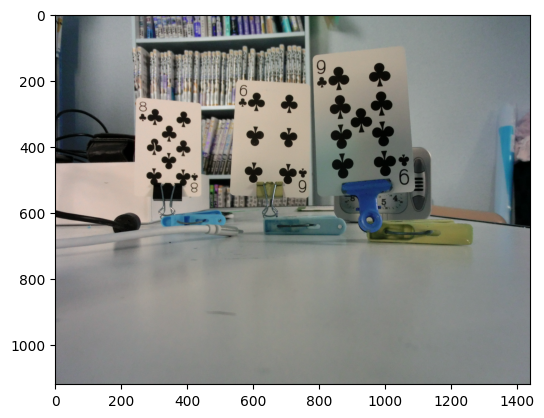

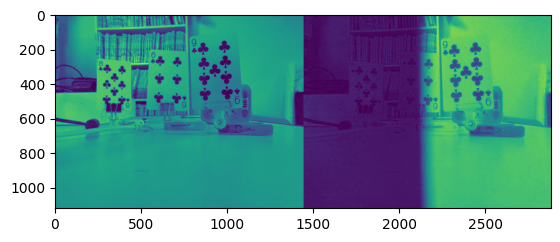

blue  Mean value for normal lens image: 126.62649
blue  Mean value for filtered lens image: 93.93155
blue  Channel Transmittance: 0.7418002


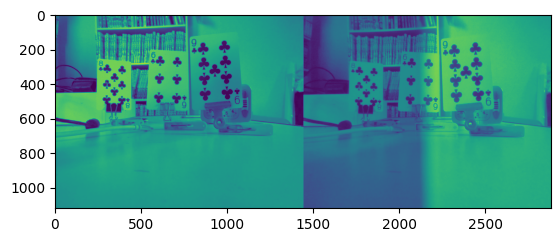

green  Mean value for normal lens image: 130.64558
green  Mean value for filtered lens image: 117.80557
green  Channel Transmittance: 0.90171874


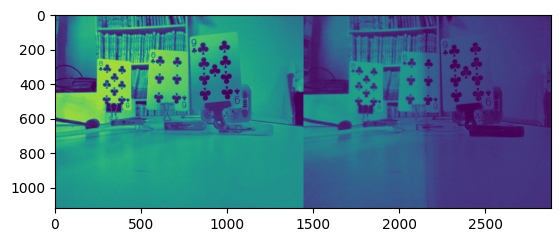

red  Mean value for normal lens image: 128.63667
red  Mean value for filtered lens image: 59.703568
red  Channel Transmittance: 0.46412554
(1920, 2560, 3)


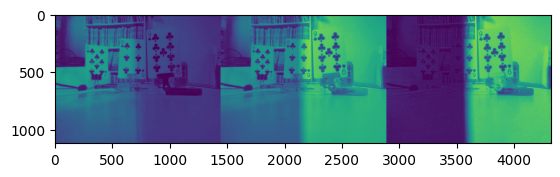

(<matplotlib.image.AxesImage at 0x7f92b6252310>, None)

In [19]:
original = "original_privicous/original.JPG"
tname = hcy


image = load(original)
plt.imshow(image),plt.show()
transparency(tname, original, types=0)
transparency(tname, original, types=1)
transparency(tname, original, types=2)

# show each channel individually
image = load(tname)
(B, G, R) = cv2.split(image)
pack = np.hstack([B, G, R])
plt.imshow(pack),plt.show()